In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [9]:
cancer = load_breast_cancer()

In [12]:
type(cancer)

sklearn.utils.Bunch

bunches act like dictionaries

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [18]:
print(cancer['DESCR'])

#make sure to use print so it is formatted correctly

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [19]:
#goal here is not to classify on whether a tumor is malignant or benign
#but to find which components are the most important in explaining
#the dataset's variance

In [23]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [20]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [21]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
#if you were to build a machine learning algorithm with this dataset,
#you would typically do PCA first to see which features are most important
#in determining whether a tumor is malignant

In [27]:
#we are dealing with 30 dimensions, which cannot be visualized. We can,
#however, visualize the two principal components into 2d space

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(df)

StandardScaler()

In [31]:
scaled_data = scaler.transform(df)

In [ ]:
#PCA uses a similar process to the other preprocessing functions such
#as sklearn.

# we will instantiate a PCA object, find the principal components using
#the fit method, and then apply the rotation and dimensionality 
#reduction by calling transform. We can also specify how many components
#we want to keep when creating the PCA object

In [33]:
#PCA

from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)

#we are attempting to keep only two components and then visualize the
#entire 30-dimensional dataset using only two dimensions.

In [35]:
pca.fit(scaled_data)

PCA(n_components=2)

In [36]:
x_pca = pca.transform(scaled_data)

In [37]:
scaled_data.shape

(569, 30)

In [38]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

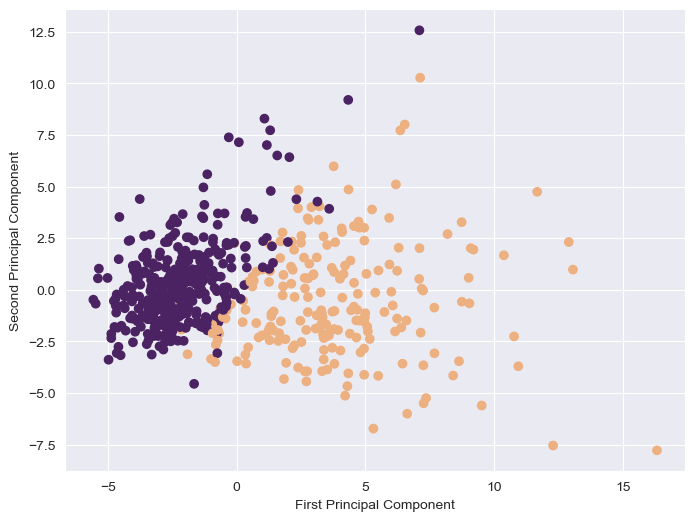

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='flare')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

#this plot looks different (almost reversed) than the video lecture,
#but running the lecture notes shows the same plot as the one here

In [45]:
#this shows that even based on two principal components, there is 
#a very clear difference between malignant and malign tumors

#the tradeoff is that we cannot easily understand what each component
#represents; they correspond to combinations of the original features
#and the components themselves are stored as an attribute of the PCA 
#object

In [46]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [47]:
#each row represents a principal component and each column relates back
#to the original features

In [48]:
df_comp = pd.DataFrame(pca.components_,columns = cancer['feature_names'])

In [49]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [50]:
#this shows a DF where each index is one of the two principal components
#and the columns show the relation to each of the original features

<AxesSubplot:>

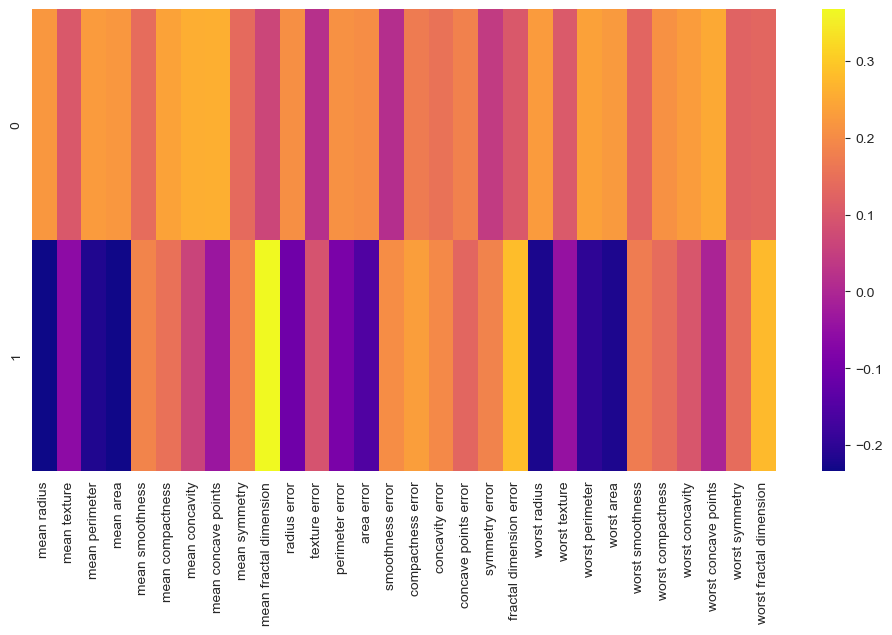

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [53]:
#shows the relationship of the various features and the principal 
#components themselves. High and low correlations seem to be reversed
#from the lecture, same as with the scatter plot.

In [54]:
#now trying with three principal components

pca3 = PCA(n_components=3)

In [55]:
pca3.fit(scaled_data)

PCA(n_components=3)

In [56]:
x_pca3 = pca3.transform(scaled_data)

In [57]:
x_pca3.shape

(569, 3)

In [59]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

Text(0.5, 0.5, 'Second Principal Component')

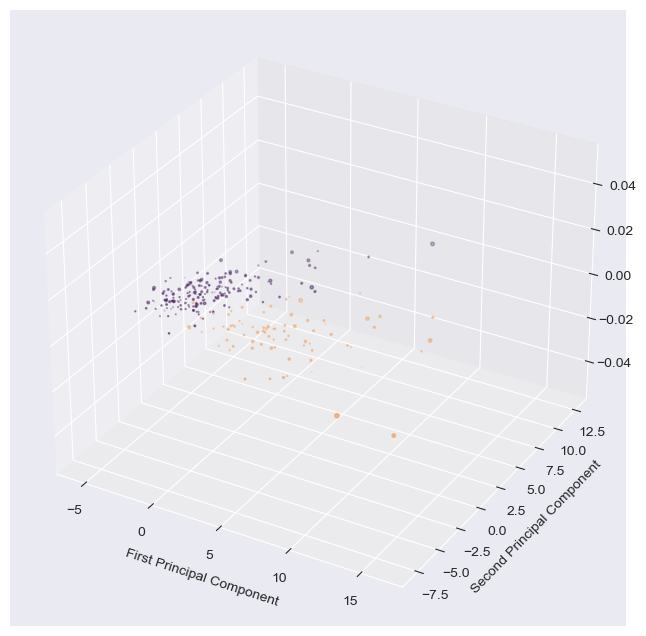

In [62]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
plt.scatter(x_pca[:,0],x_pca3[:,1],x_pca3[:,2],c=cancer['target'],cmap='flare')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.zlabel('Third Principal Component')

#too hard to read

In [63]:
import cufflinks as cf

In [64]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [65]:
init_notebook_mode(connected=True)

In [66]:
cf.go_offline()

In [67]:
x_pca3

array([[ 9.19283683,  1.94858306, -1.12316659],
       [ 2.3878018 , -3.76817176, -0.52929331],
       [ 5.73389628, -1.0751738 , -0.55174759],
       ...,
       [ 1.25617928, -1.90229671,  0.56273073],
       [10.37479406,  1.67201012, -1.87702887],
       [-5.4752433 , -0.67063681,  1.49044244]])

In [86]:
df3 = pd.DataFrame(x_pca3,columns=['X','Y','Z'])

In [88]:
df3.head()

,X,Y,Z
0,9.192837,1.948583,-1.123167
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389766


In [91]:
df3['target']=cancer['target']

In [96]:
df3.head()

,X,Y,Z,target
0,9.192837,1.948583,-1.123167,0
1,2.387802,-3.768172,-0.529293,0
2,5.733896,-1.075174,-0.551748,0
3,7.122953,10.275589,-3.232790,0
4,3.935302,-1.948072,1.389766,0


In [98]:
def converter(tumor):
    if tumor == 0:
        return 'malignant'
    elif tumor == 1:
        return 'benign'
    
#used because cufflinks would not accept boolean values when trying 
#to colorize based on category

In [100]:
df3['tumor'] = df3['target'].apply(converter)

In [101]:
df3.head()

,X,Y,Z,target,tumor
0,9.192837,1.948583,-1.123167,0,malignant
1,2.387802,-3.768172,-0.529293,0,malignant
2,5.733896,-1.075174,-0.551748,0,malignant
3,7.122953,10.275589,-3.232790,0,malignant
4,3.935302,-1.948072,1.389766,0,malignant


In [102]:
df3.iplot(kind='scatter3d',x='X',y='Y',z='Z',
    xTitle='First Principal Component',
    yTitle = 'Second Principal Component',
    zTitle = 'Third Principal Component',
    colors = ['red','blue'],categories='tumor')

In [103]:
pca3.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657546,
        -0.10555215,  0.08997968, -0.08945724, -0.15229263,  0.20443045,
         0.23271591,  0.19720728,  0.13032155,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359318,  0.09796411, -0.00825724,  0.14188335,  0.27533946],
       [-0.0085312 ,  0.06454991, -0.00931418,  0.02869954, -0.1042916 ,
        -0.07409154,  0.00273379, -0.02556364, -0

In [104]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       569 non-null    float64
 1   Y       569 non-null    float64
 2   Z       569 non-null    float64
 3   target  569 non-null    int64  
 4   tumor   569 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 22.4+ KB


In [105]:
df_comp3 = pd.DataFrame(pca3.components_,
    columns = cancer['feature_names'])

In [106]:
df_comp3

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236075,-0.173057,-0.170344,-0.271313,-0.232791


<AxesSubplot:>

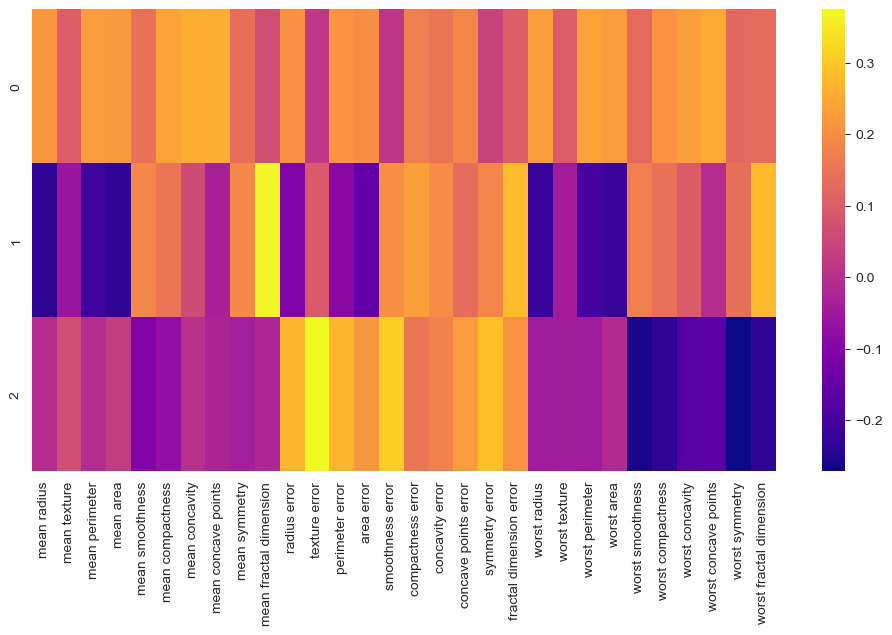

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp3,cmap='plasma')